# Importing Stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
hub_covid = pd.read_csv('../data/hub_covid_violations.csv')
davidson_cases = pd.read_csv('../data/davidson_cases.csv')

# Converting to Datetime

In [3]:
hub_covid['Date / Time Opened'] = hub_covid['Date / Time Opened'][:-4]
hub_covid['Date / Time Closed'] = hub_covid['Date / Time Closed'][:-4]

hub_covid['Date / Time Opened'] = pd.to_datetime(hub_covid['Date / Time Opened'], format='%Y-%m-%d %H:%M:%S')
hub_covid['Date / Time Closed'] = pd.to_datetime(hub_covid['Date / Time Closed'], format='%Y-%m-%d %H:%M:%S')

davidson_cases['date'] = pd.to_datetime(davidson_cases['date'], format='%Y-%m-%d')

In [4]:
hub_covid['month_day'] = hub_covid['Date / Time Opened'].dt.strftime('%m/%d')
davidson_cases['month_day'] = davidson_cases['date'].dt.strftime('%m/%d')

In [5]:
sorted_davidson = davidson_cases.sort_values(by = 'month_day')

In [6]:
sorted_covid = hub_covid.sort_values(by = 'month_day')

# Adding Per Day Counts to sorted_davidson

In [7]:
sorted_davidson['deaths_per_day'] = -1
sorted_davidson['cases_per_day'] = -1

In [8]:
for index, row in sorted_davidson.iterrows():
    if index > 0:
        sorted_davidson['deaths_per_day'][index] = sorted_davidson['deaths'][index] - sorted_davidson['deaths'][index-1]
    if sorted_davidson['deaths_per_day'][index] < 0:
        sorted_davidson['deaths_per_day'][index] = 0

In [9]:
for index, row in sorted_davidson.iterrows():
    if index > 0:
        sorted_davidson['cases_per_day'][index] = sorted_davidson['cases'][index] - sorted_davidson['cases'][index-1]
    if sorted_davidson['cases_per_day'][index] < 0:
        sorted_davidson['cases_per_day'][index] = 0

# Adding column number of violations per day

In [10]:
vio_per_day = hub_covid.groupby('month_day').count()
vio_per_day = vio_per_day.reset_index()
vio_per_day = vio_per_day[['month_day','Request #']]

In [11]:
#making list of counts in order
vio_counts = vio_per_day['Request #'].to_list()
vio_counts

[1,
 1,
 8,
 206,
 247,
 267,
 124,
 113,
 219,
 147,
 113,
 72,
 87,
 79,
 37,
 62,
 50,
 63,
 39,
 58,
 28,
 25,
 56,
 37,
 34,
 28,
 37,
 20,
 10,
 39,
 47,
 45,
 32,
 52,
 31,
 17,
 25,
 49,
 36,
 30,
 66,
 24,
 18,
 85,
 105,
 68,
 66,
 76,
 35,
 21,
 62,
 77,
 64,
 67,
 51,
 23,
 15,
 17,
 75,
 59,
 59,
 39,
 37,
 20,
 27,
 29,
 36,
 20,
 26,
 14,
 12,
 39,
 27,
 26,
 41,
 43,
 36,
 63,
 105,
 65,
 72,
 83,
 58,
 41,
 24,
 92,
 67,
 59,
 92,
 94,
 87,
 62,
 120,
 106,
 104,
 132,
 114,
 77,
 51,
 125,
 125,
 106,
 117,
 104,
 55,
 58,
 80,
 130,
 122,
 111,
 115,
 83,
 98,
 113,
 92,
 75,
 59,
 71,
 61,
 45,
 53,
 65,
 61,
 64,
 72,
 78,
 193,
 171,
 104,
 78,
 61,
 75,
 61,
 30,
 55,
 52,
 33,
 70,
 49,
 25,
 34,
 50,
 46,
 49,
 49,
 34,
 17,
 22,
 37,
 29,
 37,
 27,
 21,
 20,
 23,
 31,
 26,
 20,
 31,
 27,
 27,
 25,
 21,
 25,
 20,
 27,
 25,
 25,
 28,
 25,
 22,
 20,
 31,
 27,
 19,
 25,
 29,
 19,
 17,
 18,
 19,
 17,
 15,
 29,
 17,
 11,
 6,
 15,
 12,
 12,
 28,
 26,
 30,
 20,
 22,
 

# adding vio counts to davidson df

In [12]:
zeros = [0,0,0,0,0,0,0,0,0,0,0,0,0]
vio_counts = zeros + vio_counts

In [13]:
sorted_davidson['vio_counts_per_day'] = vio_counts

# Creating Line Plots

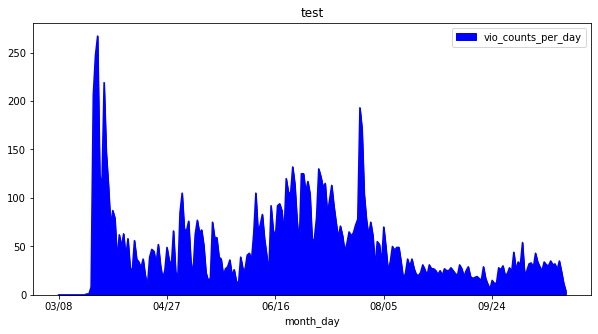

In [14]:
sorted_davidson.plot.area(x = 'month_day', y = 'vio_counts_per_day', figsize = (10,5), color = 'blue', title = 'test')

need to make line plot for cases for davison not dates

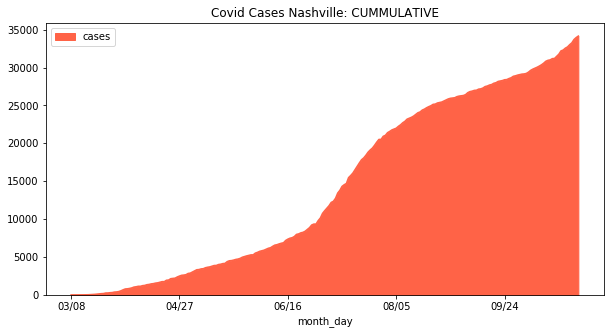

In [15]:
sorted_davidson.plot.area(x = 'month_day', y = 'cases', figsize = (10,5), color = 'tomato', title = 'Covid Cases Nashville: CUMMULATIVE')

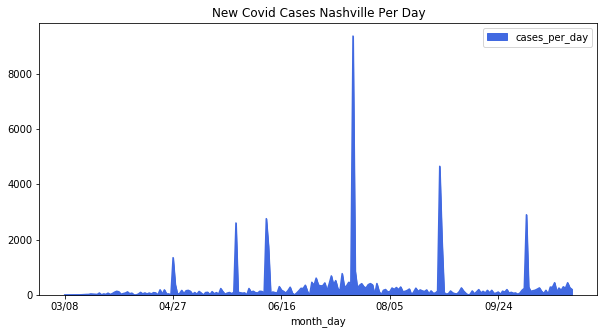

In [16]:
sorted_davidson.plot.area(x = 'month_day', y = 'cases_per_day', figsize = (10,5), color = 'royalblue', title = 'New Covid Cases Nashville Per Day')

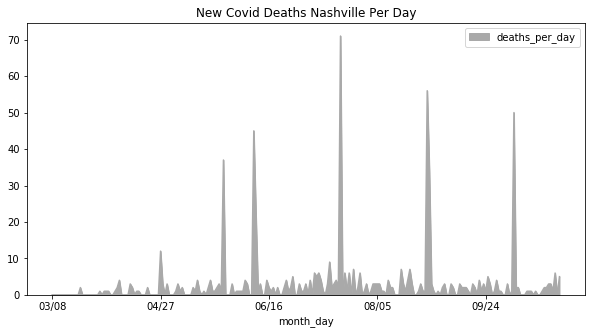

In [17]:
sorted_davidson.plot.area(x = 'month_day', y = 'deaths_per_day', figsize = (10,5), color = 'darkgray', title = 'New Covid Deaths Nashville Per Day')

# overlaying two line plots

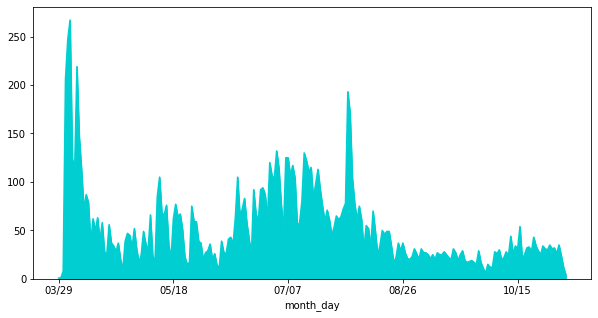

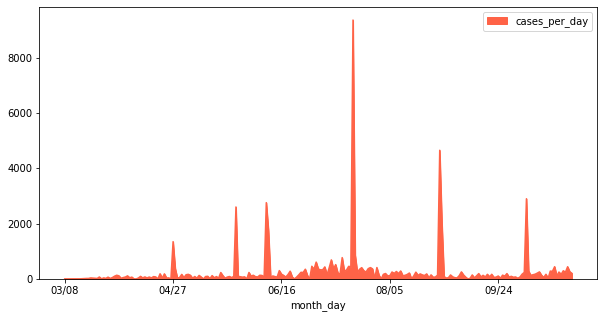

In [18]:
hub_covid.groupby('month_day')['Request #'].count().plot.area(figsize = (10,5), color = 'darkturquoise')
sorted_davidson.plot.area(x = 'month_day', y = 'cases_per_day', figsize = (10,5), color = 'tomato')
plt.show()

# Getting totals per week and create a week_df

In [19]:
d = {'weeks':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33], 'new_deaths_av':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}

In [20]:
weeks_df = pd.DataFrame(data = d)

In [21]:
weeks_df['new_cases_av'] = 0
weeks_df['vio_report_av'] = 0

In [22]:
sorted_davidson.tail()

,date,county,state,fips,cases,deaths,month_day,deaths_per_day,cases_per_day,vio_counts_per_day
230,2020-10-24,Davidson,Tennessee,47037,33016,336,10/24,3,294,26
231,2020-10-25,Davidson,Tennessee,47037,33259,337,10/25,1,243,35
232,2020-10-26,Davidson,Tennessee,47037,33699,343,10/26,6,440,24
233,2020-10-27,Davidson,Tennessee,47037,33957,341,10/27,0,258,12
234,2020-10-28,Davidson,Tennessee,47037,34156,346,10/28,5,199,4


In [23]:
for index1, row1 in sorted_davidson.iterrows():
    if (index1 % 7 == 0) & (index1 < 231):
        week = index1 / 7
        summ = sorted_davidson['deaths_per_day'][index1] + sorted_davidson['deaths_per_day'][index1+1] + sorted_davidson['deaths_per_day'][index1+2]+ sorted_davidson['deaths_per_day'][index1 + 3] + sorted_davidson['deaths_per_day'][index1 + 4] + sorted_davidson['deaths_per_day'][index1 + 5] + sorted_davidson['deaths_per_day'][index1 + 6] + sorted_davidson['deaths_per_day'][index1 + 7]
        av = summ / 7
        weeks_df['new_deaths_av'][week] = av

In [24]:
for index2, row2 in sorted_davidson.iterrows():
    if (index2 % 7 == 0) & (index2 < 231):
        week = index2 / 7
        summ = sorted_davidson['vio_counts_per_day'][index2] + sorted_davidson['vio_counts_per_day'][index2+1] + sorted_davidson['vio_counts_per_day'][index2+2]+ sorted_davidson['vio_counts_per_day'][index2 + 3] + sorted_davidson['vio_counts_per_day'][index2 + 4] + sorted_davidson['vio_counts_per_day'][index2 + 5] + sorted_davidson['vio_counts_per_day'][index2 + 6] + sorted_davidson['vio_counts_per_day'][index2 + 7]
        av = summ / 7
        weeks_df['vio_report_av'][week] = av

In [25]:
for index3, row3 in sorted_davidson.iterrows():
    if (index3 % 7 == 0) & (index3 < 231):
        week = index3 / 7
        summ = sorted_davidson['cases_per_day'][index3] + sorted_davidson['cases_per_day'][index3+1] + sorted_davidson['cases_per_day'][index3+2]+ sorted_davidson['cases_per_day'][index3 + 3] + sorted_davidson['cases_per_day'][index3 + 4] + sorted_davidson['cases_per_day'][index3 + 5] + sorted_davidson['cases_per_day'][index3 + 6] + sorted_davidson['cases_per_day'][index3 + 7]
        av = summ / 7
        weeks_df['new_cases_av'][week] = av

In [26]:
label = ['3/8','3/15','3/22','3/29','4/5','4/12','4/19','4/26','5/3','5/10','5/17','5/24','5/31','6/7','6/14','6/21','6/28','7/5','7/12','7/19','7/26','8/2','8/9','8/16','8/23','8/30','9/6','9/13','9/20','9/27','10/4','10/11','10/18','10/25']
weeks_df['labels'] = label

In [27]:
weeks_df.head()

,weeks,new_deaths_av,new_cases_av,vio_report_av,labels
0,0,0,2,0,3/8
1,1,0,21,0,3/15
2,2,0,36,169,3/22
3,3,0,78,116,3/29
4,4,2,237,53,4/5


In [28]:
weeks_df.dtypes

weeks             int64
new_deaths_av     int64
new_cases_av      int64
vio_report_av     int64
labels           object
dtype: object

# Adding columns for Rolling Averages

In [29]:
weeks_df['death_rolling'] = 0
weeks_df['cases_rolling'] = 0
weeks_df['vio_rolling'] = 0

In [30]:
# reorder df backwords
weeks_df = weeks_df.sort_values(by = 'weeks', ascending = False)
weeks_df = weeks_df.reset_index()

In [31]:
#This rolling average calculates the rolling average of the current week and previous 3 averaged together
for index4, row4 in weeks_df.iterrows():
    if index4 < 31:
        totals = (weeks_df['new_deaths_av'][index4] + weeks_df['new_deaths_av'][index4+1])/2
        weeks_df['death_rolling'][index4] = totals
        
        totals1 = (weeks_df['new_cases_av'][index4] + weeks_df['new_cases_av'][index4+1])/2
        weeks_df['cases_rolling'][index4] = totals1
        
        totals2 = (weeks_df['vio_report_av'][index4] + weeks_df['vio_report_av'][index4+1])/2
        weeks_df['vio_rolling'][index4] = totals2

In [32]:
weeks_df = weeks_df.sort_values(by = 'weeks')
weeks_df = weeks_df.reset_index()

# Rolling Average Graphs

In [ ]:
weeks_df

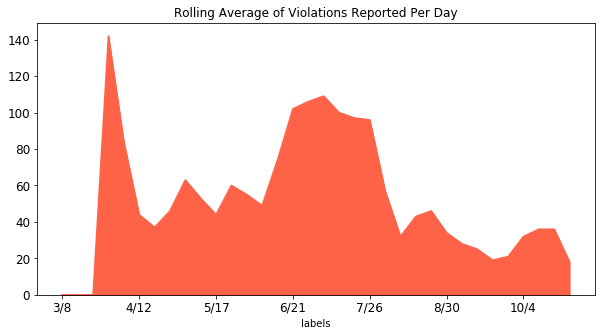

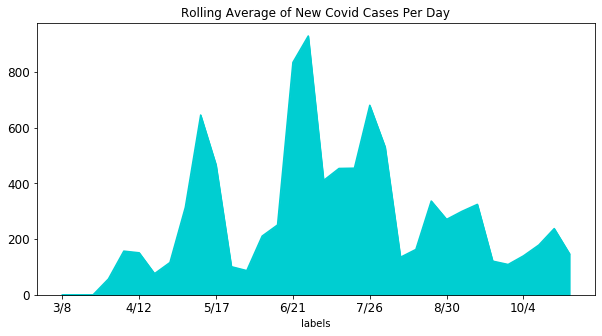

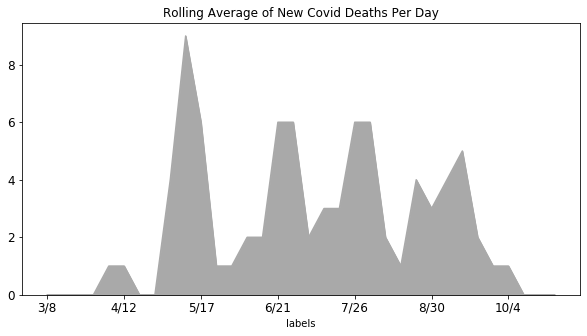

In [33]:
weeks_df.plot.area(x = 'labels', y = 'vio_rolling', figsize = (10,5), color = 'tomato', title = 'Rolling Average of Violations Reported Per Day', legend = False, fontsize = 12)
weeks_df.plot.area(x = 'labels', y = 'cases_rolling', figsize = (10,5), color = 'darkturquoise', title = 'Rolling Average of New Covid Cases Per Day', legend = False, fontsize = 12)
weeks_df.plot.area(x = 'labels', y = 'death_rolling', figsize = (10,5), color = 'darkgray', title = 'Rolling Average of New Covid Deaths Per Day', legend = False, fontsize = 12)
plt.savefig('../data/rolling_av', dpi = 150)
plt.show()